Define variables for computation and import packages

In [81]:
SYMBOL="TSLA"
COMPANY="tesla"
NEWSAPI_TOKEN = '8a15b13e21a844aa8ea71080ce103e13'
START_DATE = '2023-09-27'


import requests
import yfinance as yf
import pandas as pd
from transformers import pipeline
from collections import defaultdict
import matplotlib.pyplot as plt
from datetime import datetime

sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Fetch the news from an api for this given company

In [82]:
res = requests.get(f'https://newsapi.org/v2/everything?q={COMPANY}&from={START_DATE}&language=en&sortBy=publishedAt&apiKey={NEWSAPI_TOKEN}').json()
news = res['articles']

news

[{'source': {'id': 'the-irish-times', 'name': 'The Irish Times'},
  'author': 'Tom Tuite',
  'title': 'Tesla owner who drove with ‘arms folded’ on autopilot on M50 cleared of dangerous driving',
  'description': 'Noel Bourke (37) was pulled over by gardaí on the motorway after they saw him ‘driving with no hands’',
  'url': 'https://www.irishtimes.com/crime-law/courts/2023/10/26/tesla-owner-who-drove-with-arms-folded-on-autopilot-on-m50-cleared-of-dangerous-driving/',
  'urlToImage': 'https://www.irishtimes.com/resizer/zeXvmGYEXvI16NM5Audp3qeuD8s=/1200x630/filters:format(jpg):quality(70):focal(707x430:717x440)/cloudfront-eu-central-1.images.arcpublishing.com/irishtimes/BRSRNSXTFLQQX4ANUPOD72INQE.jpg',
  'publishedAt': '2023-10-26T18:19:06Z',
  'content': 'A Tesla owner, who drove no hands on the M50 with his arms folded, has been cleared of dangerous driving after a court heard he had activated the cars autopilot system.\r\nNoel Bourke (37), Bramley Hal… [+3425 chars]'},
 {'source': {'

Now fetch stock data

In [2]:
tsla = yf.Ticker(SYMBOL)

price_history = tsla.history(period="1mo")

print(price_history)

                                 Open        High         Low       Close  \
Date                                                                        
2023-09-27 00:00:00-04:00  244.259995  245.330002  234.580002  240.500000   
2023-09-28 00:00:00-04:00  240.020004  247.550003  238.649994  246.380005   
2023-09-29 00:00:00-04:00  250.000000  254.770004  246.350006  250.220001   
2023-10-02 00:00:00-04:00  244.809998  254.279999  242.619995  251.600006   
2023-10-03 00:00:00-04:00  248.610001  250.020004  244.449997  246.529999   
2023-10-04 00:00:00-04:00  248.139999  261.859985  247.600006  261.160004   
2023-10-05 00:00:00-04:00  260.000000  263.600006  256.250000  260.049988   
2023-10-06 00:00:00-04:00  253.979996  261.649994  250.649994  260.529999   
2023-10-09 00:00:00-04:00  255.309998  261.359985  252.050003  259.670013   
2023-10-10 00:00:00-04:00  257.750000  268.940002  257.649994  263.619995   
2023-10-11 00:00:00-04:00  266.200012  268.600006  260.899994  262.989990   

Now, we can process this and get the sentiment for all articles

In [79]:
sentiment_per_day = {}

# sort per day
groups = defaultdict(list)

for obj in news:
  print(obj['publishedAt'])
  groups[obj['publishedAt']].append(obj)
  
grouped_news = groups.values()


# TODO: GROUPS ARE NOT SPLIT CORRECTLY

for group in grouped_news:
  score = 0
  date = datetime.strptime(group[0]['publishedAt'], '%Y-%m-%dT%H:%M:%SZ')
  
  for article in group:
    sc = sentiment_pipeline(article['content'])[0]
    if sc['label'] == 'POSITIVE':
      score += sc['score']
    else:
      score -= sc['score']
      
  # print(f'{date} {score} {"positive" if score > 0 else "negative"}')
  sentiment_per_day[date.strftime('%Y-%m-%d')] = score

2023-10-26T17:10:07Z
2023-10-26T17:10:01Z
2023-10-26T16:58:23Z
2023-10-26T16:55:06Z
2023-10-26T16:43:59Z
2023-10-26T16:38:05Z
2023-10-26T16:20:08Z
2023-10-26T16:14:21Z
2023-10-26T16:12:49Z
2023-10-26T16:11:32Z
2023-10-26T16:11:15Z
2023-10-26T16:06:15Z
2023-10-26T16:04:30Z
2023-10-26T16:01:44Z
2023-10-26T16:01:02Z
2023-10-26T15:52:10Z
2023-10-26T15:50:07Z
2023-10-26T15:45:00Z
2023-10-26T15:41:00Z
2023-10-26T15:39:13Z
2023-10-26T15:27:00Z
2023-10-26T15:24:27Z
2023-10-26T15:24:27Z
2023-10-26T15:24:19Z
2023-10-26T15:22:10Z
2023-10-26T15:22:00Z
2023-10-26T15:16:09Z
2023-10-26T15:10:16Z
2023-10-26T15:09:11Z
2023-10-26T15:06:08Z
2023-10-26T14:59:56Z
2023-10-26T14:56:15Z
2023-10-26T14:56:05Z
2023-10-26T14:52:21Z
2023-10-26T14:49:39Z
2023-10-26T14:42:26Z
2023-10-26T14:40:18Z
2023-10-26T14:36:42Z
2023-10-26T14:35:17Z
2023-10-26T14:30:04Z
2023-10-26T14:26:08Z
2023-10-26T14:10:13Z
2023-10-26T14:10:00Z
2023-10-26T14:00:00Z
2023-10-26T13:53:27Z
2023-10-26T13:49:35Z
2023-10-26T13:46:24Z
2023-10-26T13

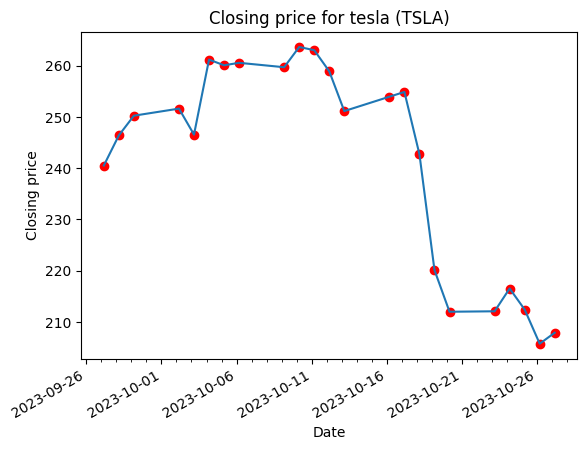

In [84]:
import matplotlib.dates as mdates

closing = price_history.get('Close')

fig, ax = plt.subplots()

x = closing.index.to_pydatetime()
y = closing

ax.set_title(f'Closing price for {COMPANY} ({SYMBOL})')

ax.set_xlabel('Date')
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.autofmt_xdate()


ax.set_ylabel('Closing price')
# ax.plot(x, y)

for date in x:
  price = closing[date]
  
  d = f'{date.year}-{date.month}-{date.day}'
  
  # color = 'green' if sentiment_per_day[d] == 'positive' else 'red'
  
  # TODO: decide the color
  
  ax.scatter(date, price, color='red')

ax.plot(x, y)

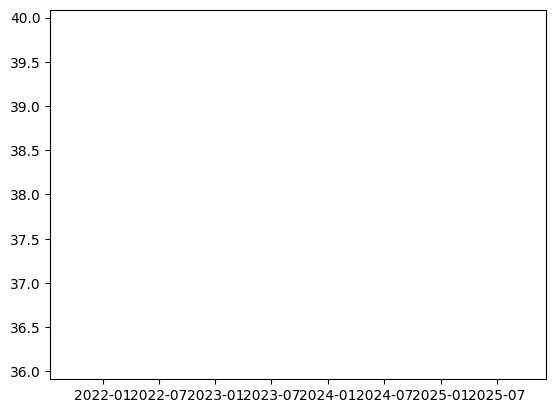

In [61]:
# from numpy.random import randint

# closing = price_history.get('Close')
# dates = closing.index.to_pydatetime() 

# first_day = dates[0]
# last_day = dates[:1][0]

# # trange = pd.date_range(first_day.strftime("%d/%m/%Y"), last_day.strftime("%d/%m/%Y"), freq='D')
# trange = pd.date_range(first_day, last_day, freq='D')

# df = pd.DataFrame({'Huts' : randint(1, 50, len(trange))}, index=trange)

# fig, ax = plt.subplots()

# ax.plot('Huts', data=df)